<a href="https://colab.research.google.com/github/AnshT013/Machine_Learning_initial_Practice/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import necessary libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Natural Language Processing tools
import re
import string

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# 📚 Library Reference – Sentiment Analysis Project

| Library                            | Purpose                                               |
|------------------------------------|-------------------------------------------------------|
| pandas, numpy                      | To handle and analyze the dataset                     |
| re, string                         | To clean and preprocess the text                       |
| CountVectorizer                    | Converts text into numbers ML can understand          |
| LogisticRegression                 | ML model for classification                           |
| train_test_split                   | For splitting data into train/test sets               |
| accuracy_score, classification_report | To evaluate the model’s performance               |
| matplotlib, seaborn                | For data visualizations (optional but helpful)        |


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sentiment_dataset_150.csv')

# Show first few rows
df.head()


,review,sentiment
0,It exceeded my expectations in every way.,1
1,"Not my type of movie, quite boring.",0
2,The movie felt too long and drawn out.,0
3,The characters were well-developed and relatable.,1
4,"Not my type of movie, quite boring.",0


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sentiment_dataset_150.csv')

# Show first few rows
df.head()


,review,sentiment
0,It exceeded my expectations in every way.,1
1,"Not my type of movie, quite boring.",0
2,The movie felt too long and drawn out.,0
3,The characters were well-developed and relatable.,1
4,"Not my type of movie, quite boring.",0


In [5]:
import string
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers and special characters using regex
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join words back to a cleaned string
    return " ".join(words)

# Apply cleaning to review column
df['cleaned_review'] = df['review'].apply(clean_text)

# View the cleaned dataset
df[['review', 'cleaned_review']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,cleaned_review
0,It exceeded my expectations in every way.,exceeded expectations every way
1,"Not my type of movie, quite boring.",type movie quite boring
2,The movie felt too long and drawn out.,movie felt long drawn
3,The characters were well-developed and relatable.,characters welldeveloped relatable
4,"Not my type of movie, quite boring.",type movie quite boring


## 🔍 Step 3: Text Preprocessing – Explanation

This step prepares our raw text so it can be used in machine learning models. Here's what each part does:

📌 Libraries Used:
- `string`: Helps remove punctuation.
- `re`: Regular expressions for removing digits.
- `nltk`: Natural Language Toolkit – used here to get common stopwords (like "the", "is", "and").

📌 Cleaning Steps in `clean_text()`:
1. **Lowercasing** – Ensures all text is in one format ("Great" and "great" become the same).
2. **Remove punctuation** – Removes symbols like `.,!?` using `string.punctuation`.
3. **Remove numbers** – Digits are removed using regex `\d+`.
4. **Remove stopwords** – Common words like "the", "is" are removed using NLTK's stopword list.
5. **Tokenize and Rejoin** – Splits sentence into words, removes stopwords, then joins it back into a cleaned sentence.

📌 Applied the function to all reviews using:
```python
df['cleaned_review'] = df['review'].apply(clean_text)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned text into numeric vectors
X = vectorizer.fit_transform(df['cleaned_review'])

# Labels (target)
y = df['sentiment']

# Show the shape of resulting feature matrix
print("Shape of feature matrix:", X.shape)


Shape of feature matrix: (150, 97)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on training data
model.fit(X_train, y_train)


LogisticRegression()

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the sentiments on test data
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
import joblib

# Save the model to a file
joblib.dump(model, 'sentiment_model.pkl')


['sentiment_model.pkl']

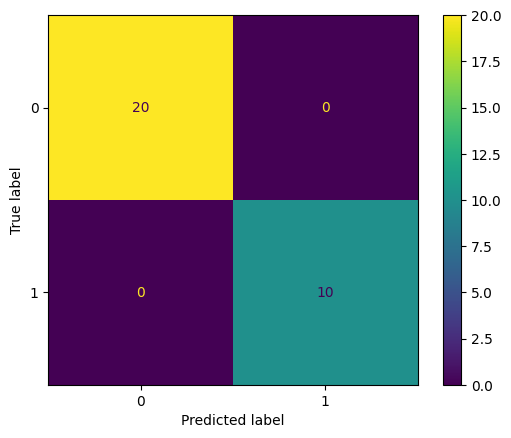

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


In [11]:
sample = ["I really loved this movie!"]
sample_vector = vectorizer.transform(sample)
prediction = model.predict(sample_vector)
print("Sentiment:", "Positive" if prediction[0] == 1 else "Negative")


Sentiment: Positive


In [14]:
sample = ["made me realise that a man can do better in life"]
sample_vector = vectorizer.transform(sample)
prediction = model.predict(sample_vector)
print("Sentiment:", "Positive" if prediction[0] == 1 else "Negative")


Sentiment: Negative
